<a href="https://colab.research.google.com/github/Qianq0625/autoencoder-test/blob/main/%E2%80%9C9_29_final_Autoencoder_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, LeakyReLU, ReLU, BatchNormalization, UpSampling2D, Conv2D, MaxPool2D, Flatten, Reshape, Softmax
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from pathlib import Path
import pandas as pd
import os
import cv2
import torch
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
from numpy import linalg as LA

In [ ]:
# Load dataset file and generate sequences

# read dataset.csv
Filename = "ID002_filtered"
dataSet = pd.read_csv("/content/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)

In [ ]:
# Generate sequences
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14  # the Minimum value
l_interval = 4 # the interval value
l_max = 18  # the Maximum value
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]

      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
"""
Change the image background to black by hiding the coordinates of the output 
and making the lines thicker to generate the desired image dataset
"""

for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()

  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")                 
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/  #Clear image folder

In [ ]:
# make image set become .tar files and download
import os, tarfile
import os
from google.colab import files

def make_targz_one_by_one(output_filename, source_dir):
  tar = tarfile.open(output_filename,"w")
  for root,dir_name,files_list in os.walk(source_dir):
    for file in files_list:
      pathfile = os.path.join(root, file)
      tar.add(pathfile)
  tar.close()
 
  files.download(output_filename)
 
make_targz_one_by_one('image14-18.tar', '/content/Figures')

In [ ]:
!tar -xvf "/content/Figures/image14-18 (4).tar" -C "/content/Figures/"  #Load dataset tar and unzip it

In [ ]:
!unzip -d /content/data/2w /content/Figures/2w.zip #Load dataset zip and unzip it

In [3]:
#load datasets and resize images to RGB images with colour lines

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image.

for filename in os.listdir(r'/content/data/2w/2w black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/2w/2w black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        img = img[45:320,45:320] #cut white area in blackground and then resize images to (28,28)
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
      
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # make BGR into RGB
        array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)

#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
#Splitting the train and test sets, as it does not make sense to divide the data set proportionally for unlabelled data
X_train = image_input
X_test = image_input

流式输出内容被截断，只能显示最后 5000 行内容。
ID010_filtered_309.png
ID003_filtered_685.png
ID018_filtered_991.png
ID019_filtered_545.png
ID009_filtered_454.png
ID005_filtered_1547.png
ID006_filtered_226.png
ID003_filtered_706.png
ID015_filtered_807.png
ID007_filtered_380.png
ID002_filtered_1190.png
ID006_filtered_40.png
ID005_filtered_278.png
ID003_filtered_526.png
ID015_filtered_598.png
ID005_filtered_343.png
ID013_filtered_434.png
ID002_filtered_377.png
ID016_filtered_619.png
ID015_filtered_554.png
ID014_filtered_427.png
ID003_filtered_693.png
ID010_filtered_813.png
ID018_filtered_1017.png
ID019_filtered_562.png
ID010_filtered_81.png
ID015_filtered_837.png
ID018_filtered_1012.png
ID018_filtered_21.png
ID005_filtered_1858.png
ID015_filtered_1291.png
ID014_filtered_393.png
ID009_filtered_616.png
ID005_filtered_2193.png
ID005_filtered_1702.png
ID008_filtered_619.png
ID019_filtered_125.png
ID018_filtered_120.png
ID010_filtered_602.png
ID002_filtered_1380.png
ID014_filtered_216.png
ID003_filtered_110.png
I

In [ ]:
#load datasets and resize images to grey images with white lines

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name.

for filename in os.listdir(r'/content/data/2w/2w black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/2w/2w black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert images to greyscale for analysis
        ret, thresh = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY) # fix the threshold to generate binarized images
        cv2_imshow(thresh)
        array_of_img.append(thresh)

image_input = np.array(array_of_img)


X_train = image_input
X_test = image_input

In [4]:
# images nomilization

#normalise 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


#gray
#X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
#X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [ ]:
# add noise to test de-noising autoencoder
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

noisy_train_data = noise(X_train)
noisy_test_data = noise(X_test)

# Create a copy of the data with added noise
noisy_train_data = noise(X_train)
noisy_test_data = noise(X_test)

# Display the train data and a version of it with added noise
display(X_train, noisy_train_data)

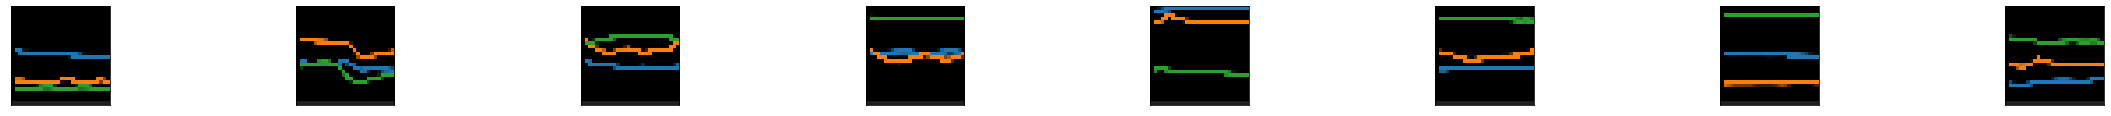

In [5]:
# show generated images and check it
n = 8
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((X_train[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512 

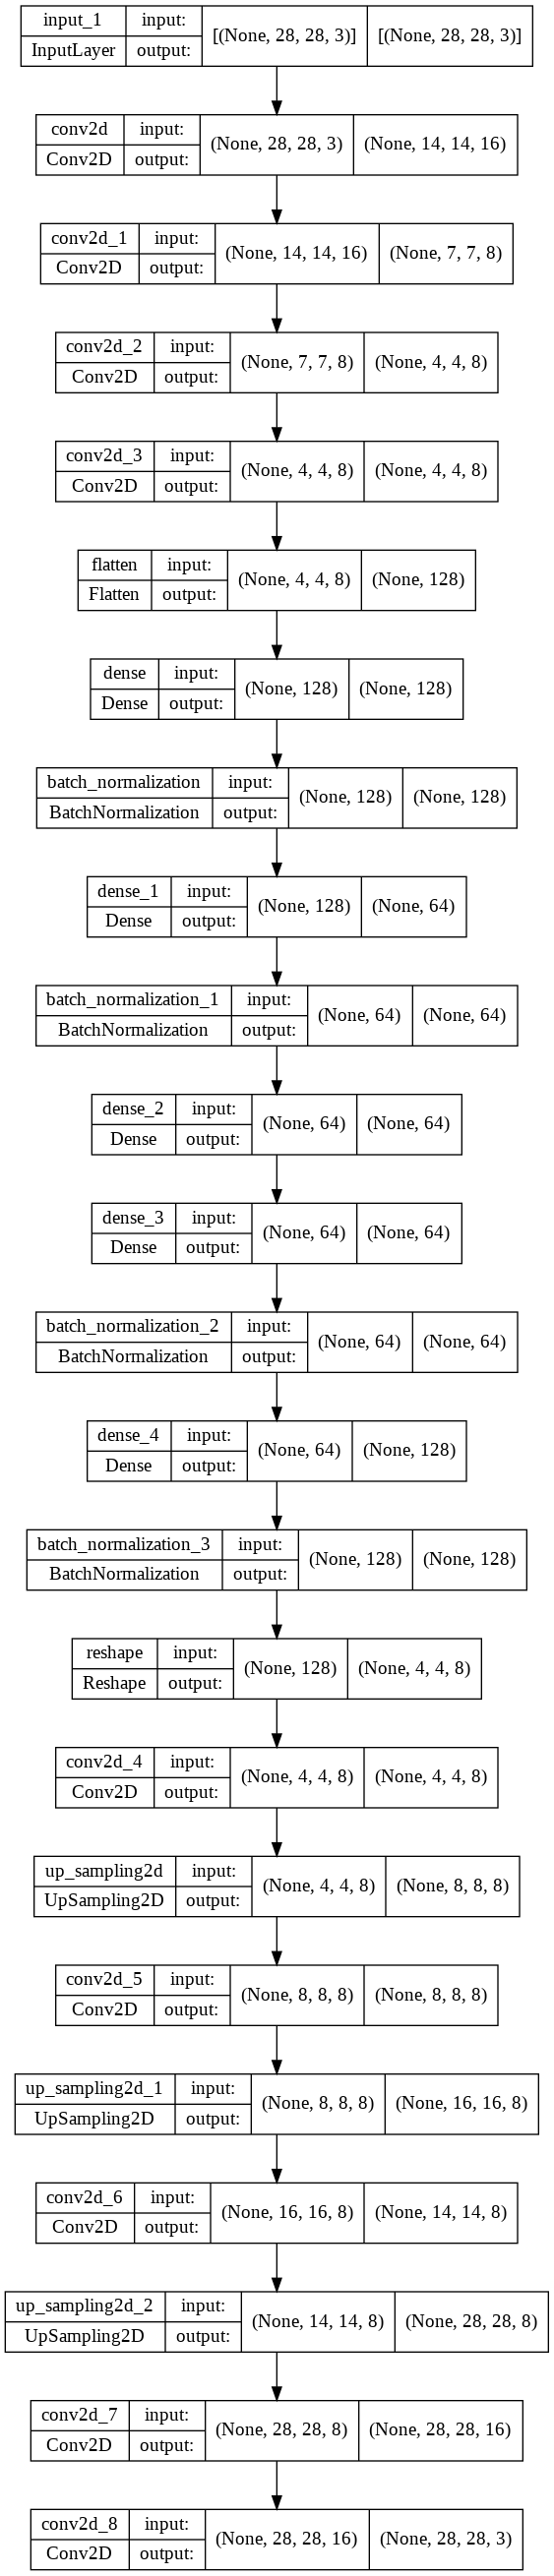

In [6]:
#cnn + flatten
#The encoder part consists of four convolutional layers, which are transformed into one-dimensional data using 'Flatten' operation, and then compressed to 64 dimensions by a fully-connected layer
#The decoder part consists of similar fully-connected layers, which are transformed into three-dimensional data using 'Reshape' operation, and then four similar convolutional layers, resulting in a reconstructed output with the same dimensionality as the input data.

#input
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(input_img)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)

# Conv 4 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = Flatten()(x)  #128
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4*4*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(x)


############
# Decoding #
############

x = Dense(4*4*8/2.0, activation='relu')(encoded)
x = BatchNormalization()(x)
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Reshape((4,4,8))(x)

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv3
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

# DeConv4
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

#output
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)


# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True) #Generating structural diagrams

In [7]:
#check model layers
for i in range(len(autoencoder.layers)):
  print(autoencoder.get_layer(index=i).output) #0-23 10

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 8), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 8), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 8), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='

Epoch 1/100
1515/1515 [==============================] - 41s 26ms/step - loss: 0.0227 - val_loss: 0.0195
Epoch 2/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0196 - val_loss: 0.0179
Epoch 3/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0183 - val_loss: 0.0164
Epoch 4/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0171 - val_loss: 0.0151
Epoch 5/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0162 - val_loss: 0.0145
Epoch 6/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0155 - val_loss: 0.0141
Epoch 7/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 8/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0146 - val_loss: 0.0125
Epoch 9/100
1515/1515 [==============================] - 39s 26ms/step - loss: 0.0143 - val_loss: 0.0124
Epoch 10/100
1515/1515 [==============================]

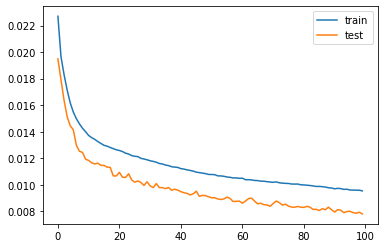

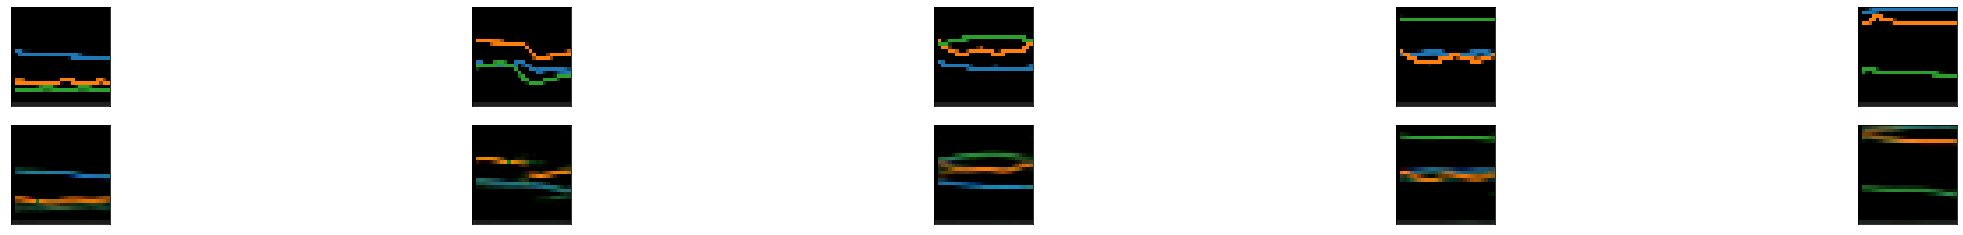

In [8]:
# train model and save it
# fit the autoencoder model to reconstruct input
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=12, shuffle=True, validation_data=(X_test,X_test))
# plot evaluation results
score = autoencoder.evaluate(X_train, X_train, batch_size=12)
print("score:" ,score)

figure(4)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=input_img, outputs=encoded)
# plot the encoder strcture
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

# define an decoder model (without the encoder)
decoder = Model(inputs=encoded, outputs=decoded)
# plot the encoder strcture
plot_model(decoder, 'decoder_no_compress.png', show_shapes=True)
# save the encoder to file
decoder.save('decoder.h5')

# test decode results and original image
decoded_imgs = autoencoder.predict(X_test)


n = 5

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow((decoded_imgs[i]* 255).astype(np.uint8))
    #plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


[134.22746]
[117.89736]
[-16.330101]
mean: -16.330101
max: -16.330101
min: -16.330101
std: 0.0
median: -16.330101
[134.22746, 127.49804]
[117.89736, 109.40285]
[-16.330101, -18.095192]
mean: -17.212646
max: -16.330101
min: -18.095192
std: 0.8825455
median: -17.212646
[134.22746, 127.49804, 131.1451]
[117.89736, 109.40285, 131.06844]
[-16.330101, -18.095192, -0.076660156]
mean: -11.500651
max: -0.076660156
min: -18.095192
std: 8.110058
median: -16.330101
[134.22746, 127.49804, 131.1451, 130.73726]
[117.89736, 109.40285, 131.06844, 125.15526]
[-16.330101, -18.095192, -0.076660156, -5.5820007]
mean: -10.020988
max: -0.076660156
min: -18.095192
std: 7.4764957
median: -10.956051
[134.22746, 127.49804, 131.1451, 130.73726, 125.18431]
[117.89736, 109.40285, 131.06844, 125.15526, 115.86422]
[-16.330101, -18.095192, -0.076660156, -5.5820007, -9.320091]
mean: -9.880809
max: -0.076660156
min: -18.095192
std: 6.693055
median: -9.320091
[134.22746, 127.49804, 131.1451, 130.73726, 125.18431, 131.682

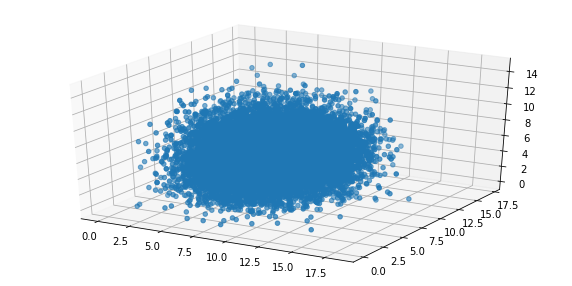

In [9]:
# Calculate the difference in rgb between the reconstruction and the original image
n = 10
img_orig_rgb = []
img_re_rgb = []
img_diff_rgb = []
#len(X_test)
for i in range(0,10,1):
    R1 = np.sum(X_test[i,:,:,0])
    G1 = np.sum(X_test[i,:,:,1])
    B1 = np.sum(X_test[i,:,:,2])
    rgb1 = R1 + G1 + B1
    img_orig_rgb.append(rgb1)
    print(img_orig_rgb)

    R2 = np.sum(decoded_imgs[i,:,:,0])
    G2 = np.sum(decoded_imgs[i,:,:,1])
    B2 = np.sum(decoded_imgs[i,:,:,2])
    rgb2 = R2 + G2 + B2
    img_re_rgb.append(rgb2)
    print(img_re_rgb)

    img_diff = img_re_rgb[i] - img_orig_rgb[i]
    img_diff_rgb.append(img_diff)
    print(img_diff_rgb)

    diff_rgb_mean = np.mean(img_diff_rgb)
    diff_rgb_max = np.max(img_diff_rgb)  
    diff_rgb_min = np.min(img_diff_rgb)  
    diff_rgb_std = np.std(img_diff_rgb)  
    diff_rgb_median = np.median(img_diff_rgb)
    print("mean:",diff_rgb_mean)
    print("max:",diff_rgb_max)
    print("min:",diff_rgb_min)
    print("std:",diff_rgb_std)
    print("median:",diff_rgb_median)

# Plot clustering results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

result = encoder.predict(X_test)
len_mlist = result.shape[0]+1
mlist = list(range(1,len_mlist))
mlist1 = np.array(mlist)

x = []
y = []
z = []
x = result[:,0]
y = result[:,1]
z = result[:,2]
#gender_labels = np.random.choice([0, 1], 35)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
#ax.scatter(x,y,z,c=mlist,cmap=plt.cm.Blues,edgecolor='none',s=20)
#ax1.plot(x1,y1,z1)

plt.show()
#for i in range(len(y)):

    #plt.text(x[i]*1.01, y[i]*1.01, z[i]*1.01, s = '%d' % (int(i)), fontsize=10, fontstretch = 'condensed', color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=15)
#plt.savefig('result.png')
#plt.show()



In [19]:
# Calculate the difference in rgb between the reconstruction and the original image
# For a single image, the values of each channel in R,G,B correspond, so we choose one of the channels for comparison
n = 10

diff_R_all = []
#len(X_test)
for i in range(0,10,1):
    img_diff_R = np.array(X_test[i,:,:,0] - decoded_imgs[i,:,:,0])  #28*28 10
    #print(img_diff_R)
    print(img_diff_R, file=open("img_diff_R.txt", "a"))
    diff_R = np.linalg.det(img_diff_R)
    diff_R_all.append(diff_R)
    print(diff_R_all)
    
    diff_r_mean = np.mean(diff_R_all)
    diff_r_max = np.max(diff_R_all)  
    diff_r_min = np.min(diff_R_all)  
    diff_r_std = np.std(diff_R_all)  
    diff_r_median = np.median(diff_R_all)
    print("mean:",diff_r_mean)
    print("max:",diff_r_max)
    print("min:",diff_r_min)
    print("std:",diff_r_std)
    print("median:",diff_r_median)


[0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mean: 0.0
max: 0.0
min: 0.0
std: 0.0
median: 0.0


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1651

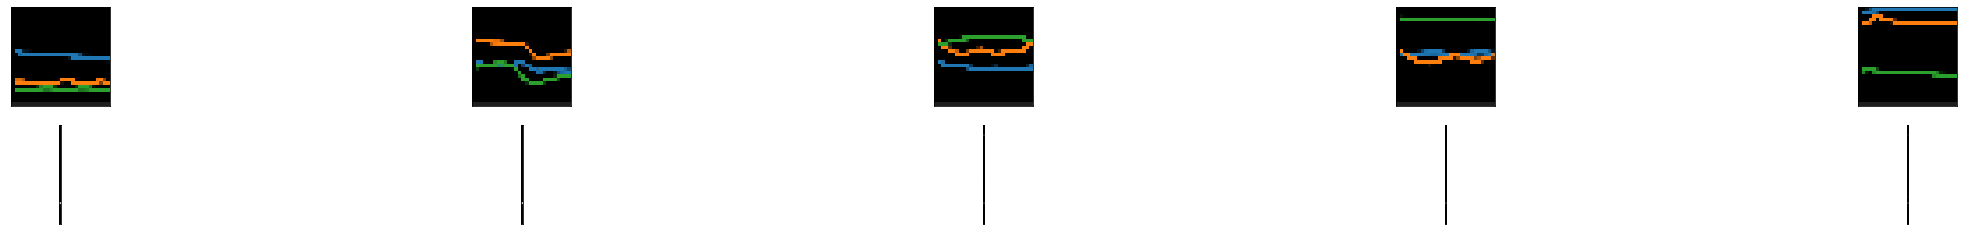

In [11]:
# add softmax to encoder part and build a new classification model
base_model = tf.keras.models.load_model('/content/encoder.h5')
base_model.load_weights('encoder.h5')

X = base_model.output
predictions = Dense(64, activation='softmax')(X)
newmodel = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:   #Freeze already trained layers
  layer.trainable = False
newmodel.summary()

print(predictions)

#test pattern1
clf_train = newmodel.predict(X_train)
clf_test = newmodel.predict(X_test)

newmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy']) 
loss, acc = newmodel.evaluate(X_test,clf_test)
print("Loss:", loss)
print("Acc:", acc)
print("softmax output:", clf_test)

encoder_test = encoder.predict(X_test)
print("encoder output:", encoder_test)

# plot images and corresponding 64X1 Probabilistic results
n = 5

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((clf_test[i]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(clf_test[i])
    

In [12]:
#test similar images
#calculate the difference between the classification results of two similar images
n = 2
#len(X_test)
for i in range(0,n,1):
    #print(clf_test[1,:])
    R = np.sum(clf_test[i,:])
    G = np.sum(encoder_test[i,:])
    print(R)
    print(G)

for i in range(0,n,1):
  x = clf_test[0,:] 
  y = clf_test[1,:]
  #print(x)
  #print(y)
  d=np.sqrt(np.sum(np.square(x-y)))
  print(d)

1.0
284.40295
1.0
327.01157
0.023629226
0.023629226
